<a href="https://colab.research.google.com/github/Anitagg1/Phyton-Workshop/blob/main/last_amazon_presentation_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_csv('/content/Sales_summary_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df

In [32]:
df.dtypes

title                   object
InvoiceNo               object
StockCode               object
Quantity               float64
InvoiceDate     datetime64[ns]
CustomerID             float64
Country                 object
url                     object
rating                 float64
review_count           float64
price                  float64
product_type            object
total_sale             float64
ASIN                    object
total                  float64
day_of_week             object
month                   object
hour                   float64
Date                    object
Time                    object
dtype: object

In [6]:
df['total'] = df['Quantity'] * df['price']

In [7]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, errors='coerce')

In [8]:
df['day_of_week'] = df['InvoiceDate'].dt.day_name()

In [9]:
df['month'] = df['InvoiceDate'].dt.month_name()

In [10]:
df['hour'] = df['InvoiceDate'].dt.hour

In [11]:
df['Date'] = df['InvoiceDate'].dt.strftime('%d/%m/%Y')
df['Time'] = df['InvoiceDate'].dt.strftime('%H:%M')

In [ ]:
##########

In [13]:
df1 = df.groupby(by = ['ASIN', 'title', 'product_type']).sum()['total'].nlargest(5).reset_index()
df1.columns = ['ASIN','title', 'product_type', 'total']

In [ ]:
df1

In [95]:
df11 = df.groupby(by = ['CustomerID']).sum()['total'].nsmallest(50).reset_index()
df11.columns = ['CustomerID', 'total']

In [ ]:
df11

Text(0, 0.5, 'Total - USD')

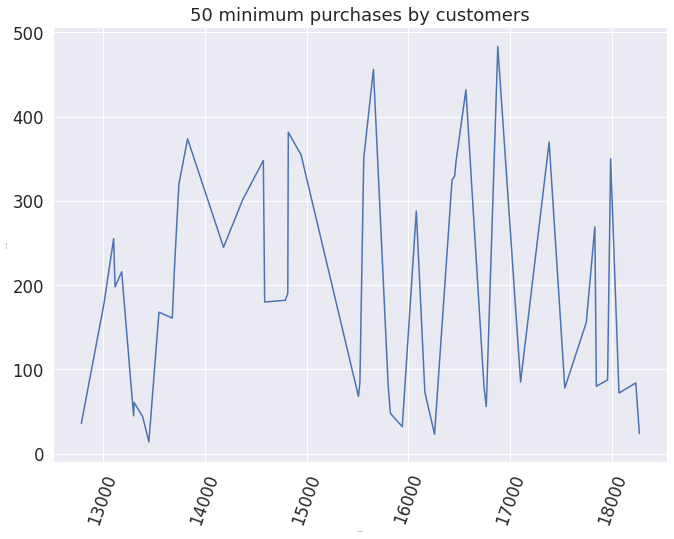

In [99]:
sns.lineplot(data=df11, x="CustomerID", y="total")
sns.set(font_scale=1.5) 
plt.title("50 minimum purchases by customers")
plt.xlabel("Customers",fontsize = 1)
plt.xticks(rotation=70)
plt.ylabel("Total - USD", fontsize = 0.5)

In [100]:
df12 = df.groupby(by = ['CustomerID']).sum()['total'].nlargest(50).reset_index()
df12.columns = ['CustomerID', 'total']

Text(0, 0.5, 'Total - USD')

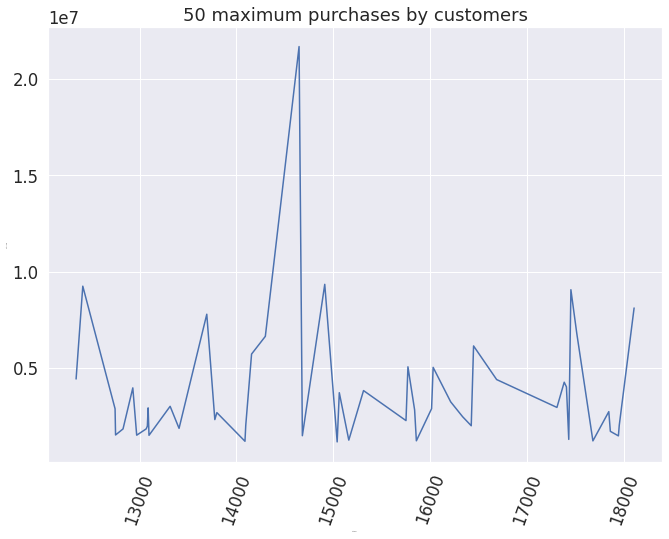

In [101]:
sns.lineplot(data=df12, x="CustomerID", y="total")
sns.set(font_scale=1.5) 
plt.title("50 maximum purchases by customers")
plt.xlabel("Customers",fontsize = 1)
plt.xticks(rotation=70)
plt.ylabel("Total - USD", fontsize = 0.5)

Text(0, 0.5, 'Total - USD')

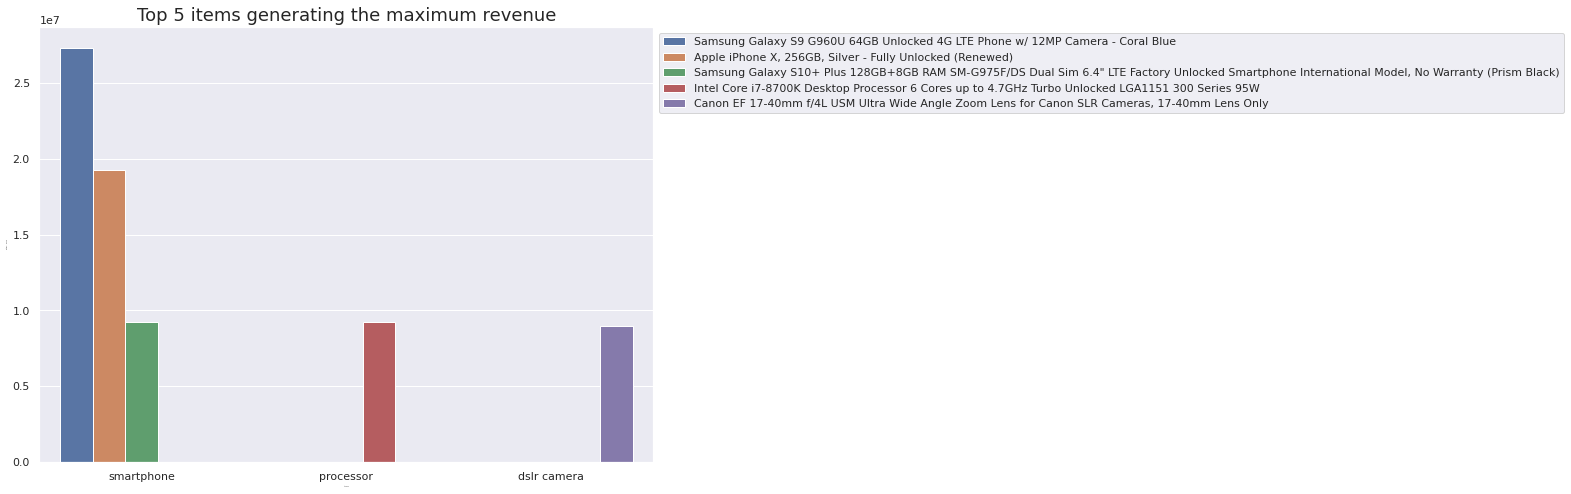

In [31]:
sns.barplot(data=df1, x="product_type", y="total", hue="title").legend(bbox_to_anchor=(1,1))
sns.set(font_scale=1.5) 
plt.title("Top 5 items generating the maximum revenue")
plt.xlabel("Items",fontsize = 2)
plt.ylabel("Total - USD", fontsize = 2)



In [83]:
df1

,ASIN,title,product_type,total
0,B079JSZ1Z2,Samsung Galaxy S9 G960U 64GB Unlocked 4G LTE P...,smartphone,27327048.60
1,B081TJ7B88,"Apple iPhone X, 256GB, Silver - Fully Unlocked...",smartphone,19288555.00
2,B07NZX5BKH,Samsung Galaxy S10+ Plus 128GB+8GB RAM SM-G975...,smartphone,9271575.00
3,B07598VZR8,Intel Core i7-8700K Desktop Processor 6 Cores ...,processor,9217596.44
4,B00009R6WO,Canon EF 17-40mm f/4L USM Ultra Wide Angle Zoo...,dslr camera,9009418.00


In [ ]:
plt.savefig('five.png', dpi=1200)

In [45]:
df2 = df.groupby(by = ['month', 'product_type']).sum()['total'].reset_index()
df2.columns = ['month', 'product_type', 'total']

Text(0, 0.5, 'Total - USD')

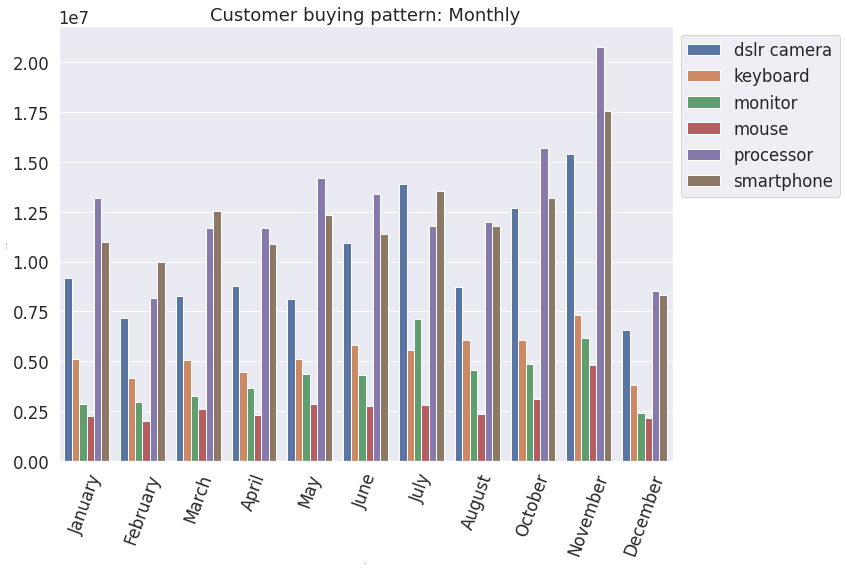

In [44]:
month_order = ["January", "February", "March", "April", "May", "June", "July",  "August",  "October", "November" , "December"]

sns.barplot(data=df2, x="month", y="total", hue="product_type", order= month_order).legend(bbox_to_anchor=(1,1))
sns.set(font_scale=1.5) 
plt.title("Customer buying pattern: Monthly")
plt.xlabel("Items",fontsize = 1)
plt.xticks(rotation=70)
plt.ylabel("Total - USD", fontsize = 0.5)

In [52]:
df3 = df.groupby(by = ['day_of_week', 'product_type']).sum()['total'].reset_index()
df3.columns = ['day_of_week', 'product_type', 'total']

Text(0, 0.5, 'Total - USD')

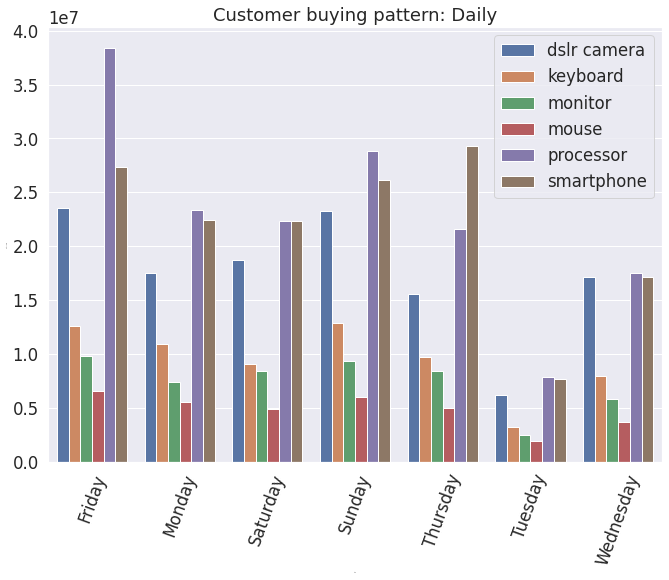

In [56]:


sns.barplot(data=df3, x="day_of_week", y="total", hue="product_type").legend(bbox_to_anchor=(1,1))
sns.set(font_scale=1.5) 
plt.title("Customer buying pattern: Daily")
plt.xlabel("Items",fontsize = 1)
plt.xticks(rotation=70)
plt.ylabel("Total - USD", fontsize = 0.5)

In [55]:
df4 = df.groupby(by = ['hour', 'product_type']).sum()['total'].reset_index()
df4.columns = ['hour', 'product_type', 'total']

Text(0, 0.5, 'Total - USD')

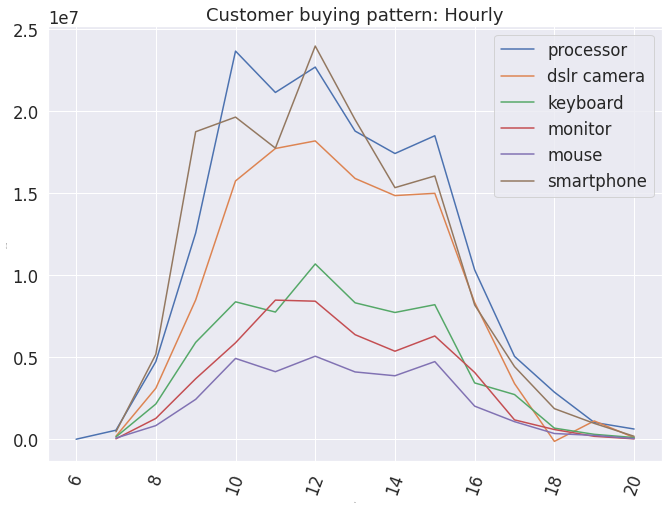

In [57]:
sns.lineplot(data=df4, x="hour", y="total", hue="product_type").legend(bbox_to_anchor=(1,1))
sns.set(font_scale=1.5) 
plt.title("Customer buying pattern: Hourly")
plt.xlabel("Items",fontsize = 1)
plt.xticks(rotation=70)
plt.ylabel("Total - USD", fontsize = 0.5)

In [58]:
df5 = df.groupby(by = ['CustomerID', 'product_type']).sum()['total'].reset_index()
df5.columns = ['CustomerID', 'product_type', 'total']

Text(0, 0.5, 'Total Purchases in USD')

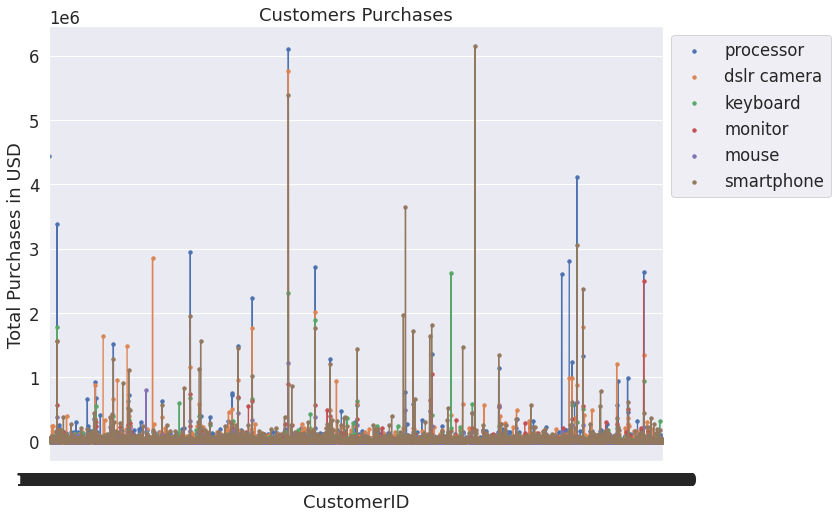

In [60]:
ax = sns.pointplot(data = df5[['CustomerID','total', 'product_type']], x = 'CustomerID', y = 'total', hue= 'product_type', 
              scale = 0.5).legend(bbox_to_anchor=(1,1))
plt.title("Customers Purchases")

plt.ylabel("Total Purchases in USD")

In [61]:
df6 = df.groupby(by = ['CustomerID', 'product_type']).sum()['Quantity'].reset_index()
df6.columns = ['CustomerID', 'product_type', 'Quantity']

Text(0, 0.5, 'Total Number of Orders')

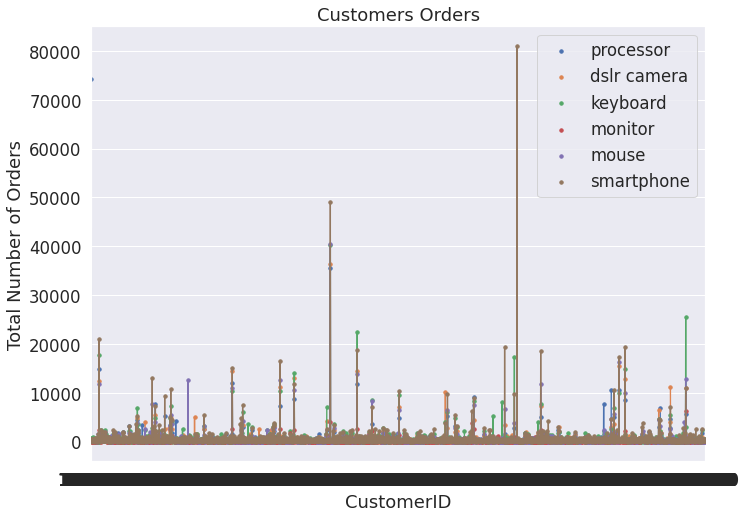

In [63]:
ax = sns.pointplot(data = df6[['CustomerID','Quantity', 'product_type']], x = 'CustomerID', y = 'Quantity', hue= 'product_type', 
              scale = 0.5).legend(bbox_to_anchor=(1,1))
plt.title("Customers Orders")

plt.ylabel("Total Number of Orders")

In [76]:
df7 = df.groupby(by = ['Country', 'product_type']).sum()['Quantity'].nlargest(30).reset_index()
df7.columns = ['country','product_type', 'total']

Text(0, 0.5, 'Total - USD')

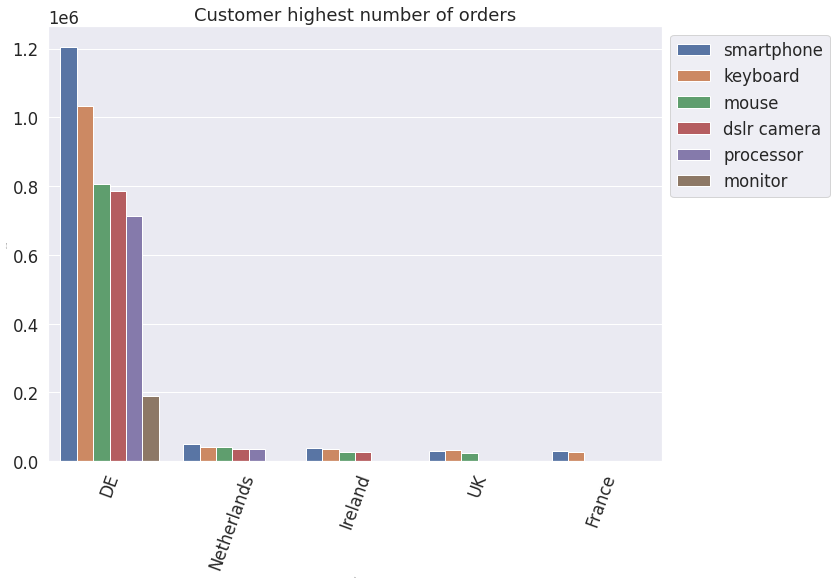

In [71]:
sns.barplot(data=df7, x="country", y="total", hue="product_type").legend(bbox_to_anchor=(1,1))
sns.set(font_scale=1.5) 
plt.title("Customer highest number of orders")
plt.xlabel("Items",fontsize = 1)
plt.xticks(rotation=70)
plt.ylabel("Total - USD", fontsize = 0.5)

In [79]:
df8 = df.groupby(by = ['Country', 'product_type']).sum()['total'].nlargest(30).reset_index()
df8.columns = ['country','product_type', 'total']

Text(0, 0.5, 'Total - USD')

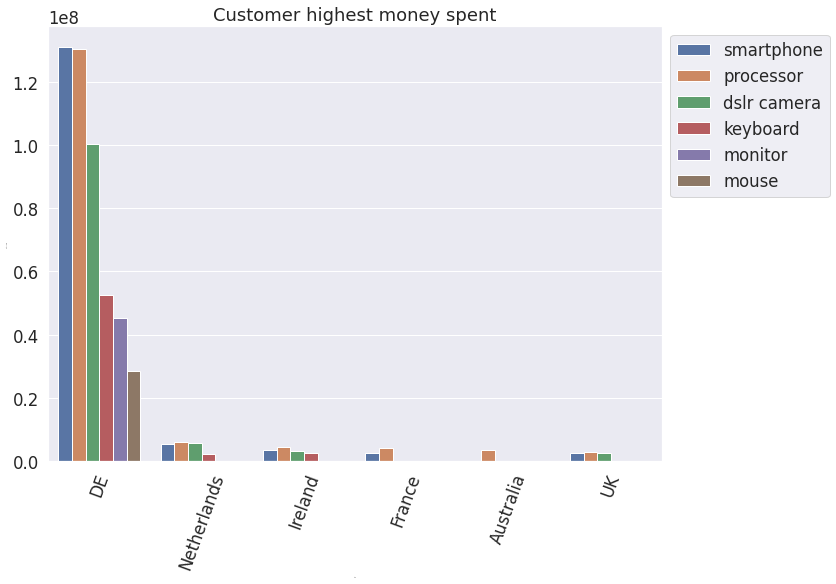

In [73]:
sns.barplot(data=df8, x="country", y="total", hue="product_type").legend(bbox_to_anchor=(1,1))
sns.set(font_scale=1.5) 
plt.title("Customer highest money spent")
plt.xlabel("Items",fontsize = 1)
plt.xticks(rotation=70)
plt.ylabel("Total - USD", fontsize = 0.5)

In [77]:
not_country = ['DE']


df9 = df7.loc[df7['country'].apply(lambda x: x not in not_country)]
print(f'AFTER: \n {df9}')

AFTER: 
         country product_type    total
6   Netherlands   smartphone  50014.0
7   Netherlands        mouse  41108.0
8   Netherlands     keyboard  41074.0
9       Ireland   smartphone  38080.0
10  Netherlands  dslr camera  36940.0
11  Netherlands    processor  36010.0
12      Ireland     keyboard  35335.0
13           UK     keyboard  31176.0
14           UK   smartphone  31029.0
15       France   smartphone  30950.0
16      Ireland        mouse  27905.0
17      Ireland  dslr camera  26889.0
18       France     keyboard  25612.0
19           UK        mouse  24844.0
20    Australia   smartphone  22509.0
21       France    processor  21117.0
22       France        mouse  20286.0
23      Ireland    processor  20083.0
24           UK  dslr camera  19366.0
25    Australia     keyboard  19154.0
26    Australia    processor  16669.0
27       France  dslr camera  15495.0
28    Australia  dslr camera  13313.0
29           UK    processor  13056.0


Text(0, 0.5, 'Total - USD')

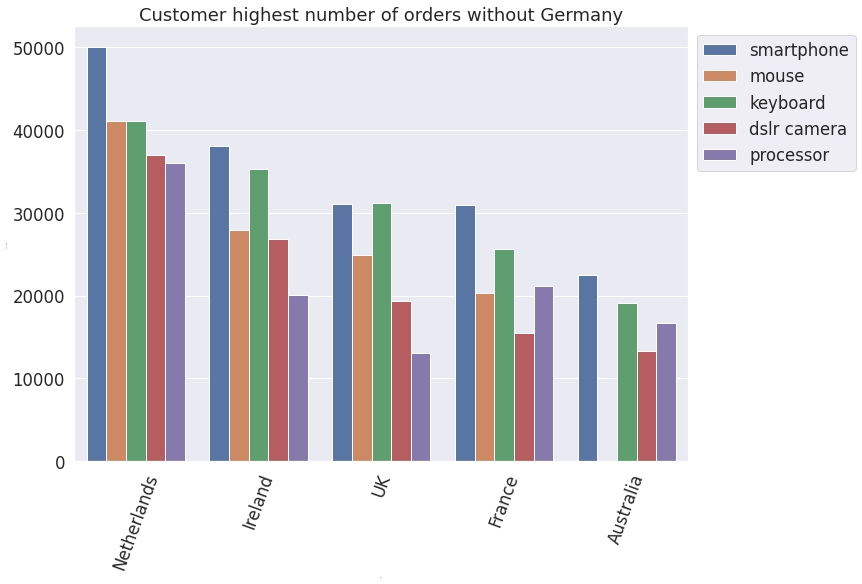

In [78]:
sns.barplot(data=df9, x="country", y="total", hue="product_type").legend(bbox_to_anchor=(1,1))
sns.set(font_scale=1.5) 
plt.title("Customer highest number of orders without Germany")
plt.xlabel("Items",fontsize = 1)
plt.xticks(rotation=70)
plt.ylabel("Total - USD", fontsize = 0.5)

In [80]:
not_country = ['DE']


df10 = df8.loc[df8['country'].apply(lambda x: x not in not_country)]
print(f'AFTER: \n {df10}')

AFTER: 
         country product_type       total
6   Netherlands    processor  6201620.14
7   Netherlands  dslr camera  5832178.70
8   Netherlands   smartphone  5480244.24
9       Ireland    processor  4462822.18
10       France    processor  4184983.57
11    Australia    processor  3585881.67
12      Ireland   smartphone  3462028.58
13      Ireland  dslr camera  3087916.78
14           UK    processor  2959347.51
15           UK   smartphone  2724024.22
16      Ireland     keyboard  2679009.28
17       France   smartphone  2571172.51
18           UK  dslr camera  2529233.58
19  Netherlands     keyboard  2352575.78
20       France  dslr camera  1980281.68
21    Australia     keyboard  1828169.38
22    Australia  dslr camera  1752791.23
23    Australia   smartphone  1633216.15
24       France     keyboard  1571498.63
25           UK     keyboard  1527189.57
26       Sweden    processor  1342689.58
27      Ireland      monitor  1329621.36
28        Japan    processor  1259346.52
29  Net

In [ ]:
df10

Text(0, 0.5, 'Total - USD')

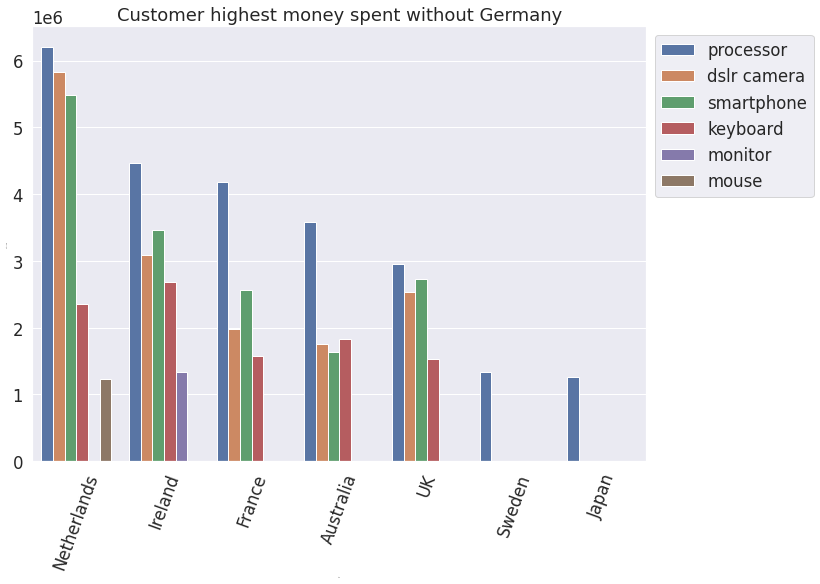

In [81]:
sns.barplot(data=df10, x="country", y="total", hue="product_type").legend(bbox_to_anchor=(1,1))
sns.set(font_scale=1.5) 
plt.title("Customer highest money spent without Germany")
plt.xlabel("Items",fontsize = 1)
plt.xticks(rotation=70)
plt.ylabel("Total - USD", fontsize = 0.5)

In [103]:
process = df[df['product_type'] == 'processor' ] 

In [ ]:
sec_process = process.sort_values(by = 'total', ascending = False ).head(2)
sec_process.plot.bar(rot=0)
